In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
from hessian.newton import NewtonDescent  
from test_functions import f1, himmelblau, ackley

Text(0, 7.5, 'x* = [1.72727273 0.45454545]\nf (x*) = 2.181818181818182;\nsteps=1\nstopped by x convergence. delta x = 2.791609379366768e-15')

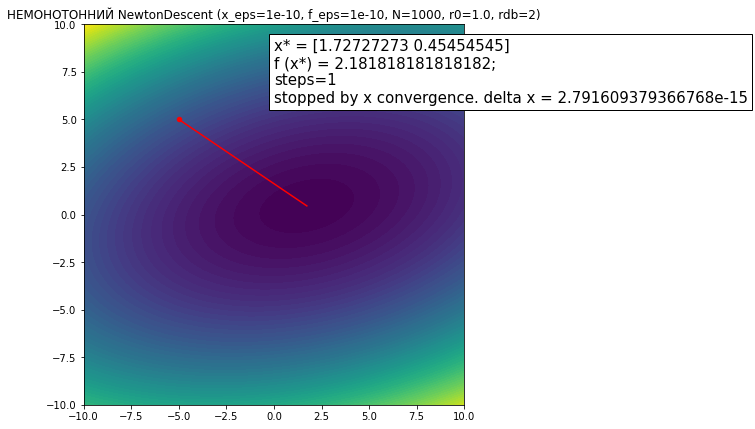

In [3]:
# Визначаємо метод оптимізації
method = NewtonDescent(timeout=1000, rate=1, monotonous=False)
# Оптимізуємо. Зберігаємо результат. (див. файл dumb_gradient.py щоб подивитися, що містить result)
result = method.optimize(f1, f1.df, f1.ddf, x_start=(-5,5))

# Беремо з результату послідовності {x_n}, {y_n}:
#   `result['x_history']` - це послідовність {(x_n, y_n)} - матриця (n, 2)
#   `result['x_history'].T` - це транспонування матриці - маємо матрицю (2, n)
# В `x_history` потрапить перший рядок, в `y_history` - другий рядок
x_history, y_history = result['x_history'].T

# створюємо двовимірний "лінійний простір" з двох одновимірних
# np.linspace(x0, x1, n) = { x0 + k * (x1-x0)/n | k = [0,n] } 
ls = np.linspace(-10,10,200)
xx, yy = np.meshgrid(ls, ls, sparse=True)

# gcf - get current figure - об'єкт для керування зображенням
# gca - get current axes - об'єкт для керування осями та графіком
fig = plt.gcf()
ax = plt.gca()

# Підготовка зображення
ax.set_aspect(1.0) # відношення сторін 1:1
ax.set_xlim(-10,10) # межі по x
ax.set_ylim(-10,10) # межі по y
fig.set_size_inches((7,7)) # розмір зображення в "дюймах"
ax.set_title(str(method)) # додати заголовок

# Побудова графіків
plt.contourf(ls, ls, f1([xx,yy]), levels=70) # Кольоровий графік f1(x,y) на області визначення ls x ls 
plt.scatter(x_history[0], y_history[0], c='r', s=20) # Позначити червоним кружечком початкову точку
plt.plot(x_history, y_history, c='r') # Побудувати траекторію спуску 

# Текст з описом результатів спуску
plt.text(0, 7.5, f"x* = {result['x']}\nf (x*) = {result['f']};\nsteps={result['steps']}\n{result['message']}", 
    size=15, ha='left', va='center', bbox=dict(boxstyle='square', fc='white'))

# Додаткова детальна інформація текстом
# print(result)
# print("x = ", result['x'], ";    f(x) = ", result['f'])


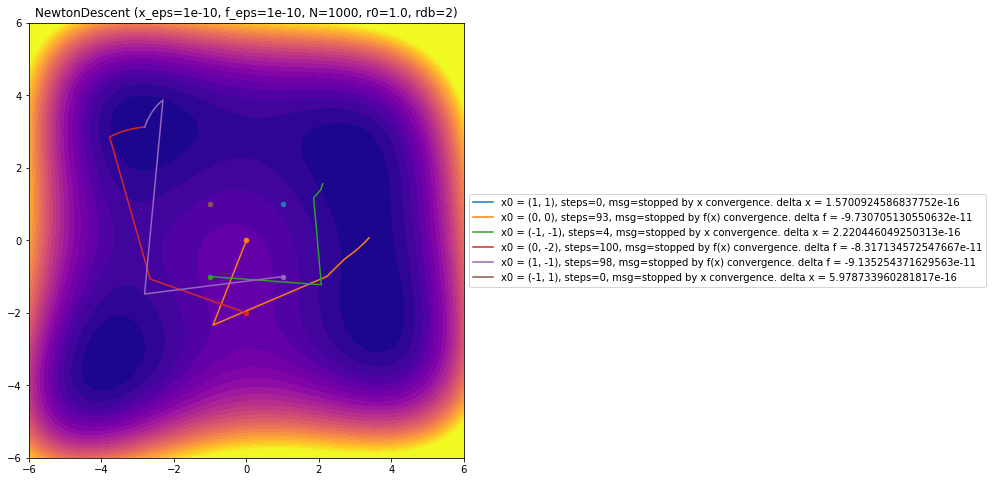

In [4]:
f = himmelblau.f
df = himmelblau.df
ddf = himmelblau.ddf

# my_cmap = cm.coolwarm
ls = np.linspace(-8,8,200)
xx, yy = np.meshgrid(ls, ls, sparse=True)

fig = plt.gcf()
ax = plt.gca()

method = NewtonDescent(timeout=1000, rate=1)

# Підготовка зображення
ax.set_aspect(1.0) # відношення сторін 1:1
ax.set_xlim(-6,6) # межі по x
ax.set_ylim(-6,6) # межі по y
fig.set_size_inches((8,8)) # розмір зображення в "дюймах"
ax.set_title(str(method)) # додати заголовок

# Побудова графіків
plt.contourf(ls, ls, f([xx,yy]), levels=200, vmin=0, vmax=1000, cmap='plasma') # Кольоровий графік f1(x,y) на області визначення ls x ls 


for x0 in [(1,1), (0,0), (-1,-1), (0,-2), (1,-1), (-1,1)]:
    result = method.optimize(f, df, ddf, x_start=x0)

    x_history, y_history = result['x_history'].T


    plt.scatter(x_history[0], y_history[0], s=20) # Позначити червоним кружечком початкову точку
    plt.plot(x_history, y_history, label=f'x0 = {x0}, steps={result["steps"]}, msg={result["message"]}') # Побудувати траекторію спуску 


plt.legend(loc='center left', bbox_to_anchor=(1,0.5))

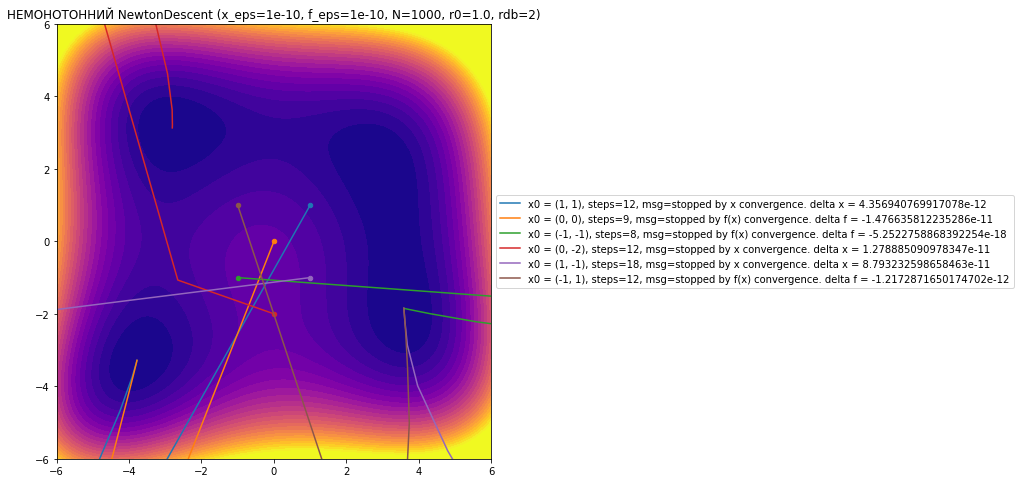

In [5]:
f = himmelblau.f
df = himmelblau.df
ddf = himmelblau.ddf

# my_cmap = cm.coolwarm
ls = np.linspace(-8,8,200)
xx, yy = np.meshgrid(ls, ls, sparse=True)

fig = plt.gcf()
ax = plt.gca()

method = NewtonDescent(timeout=1000, rate=1, monotonous=False)

# Підготовка зображення
ax.set_aspect(1.0) # відношення сторін 1:1
ax.set_xlim(-6,6) # межі по x
ax.set_ylim(-6,6) # межі по y
fig.set_size_inches((8,8)) # розмір зображення в "дюймах"
ax.set_title(str(method)) # додати заголовок

# Побудова графіків
plt.contourf(ls, ls, f([xx,yy]), levels=200, vmin=0, vmax=1000, cmap='plasma') # Кольоровий графік f1(x,y) на області визначення ls x ls 


for x0 in [(1,1), (0,0), (-1,-1), (0,-2), (1,-1), (-1,1)]:
    result = method.optimize(f, df, ddf, x_start=x0)

    x_history, y_history = result['x_history'].T


    plt.scatter(x_history[0], y_history[0], s=20) # Позначити червоним кружечком початкову точку
    plt.plot(x_history, y_history, label=f'x0 = {x0}, steps={result["steps"]}, msg={result["message"]}') # Побудувати траекторію спуску 


plt.legend(loc='center left', bbox_to_anchor=(1,0.5))

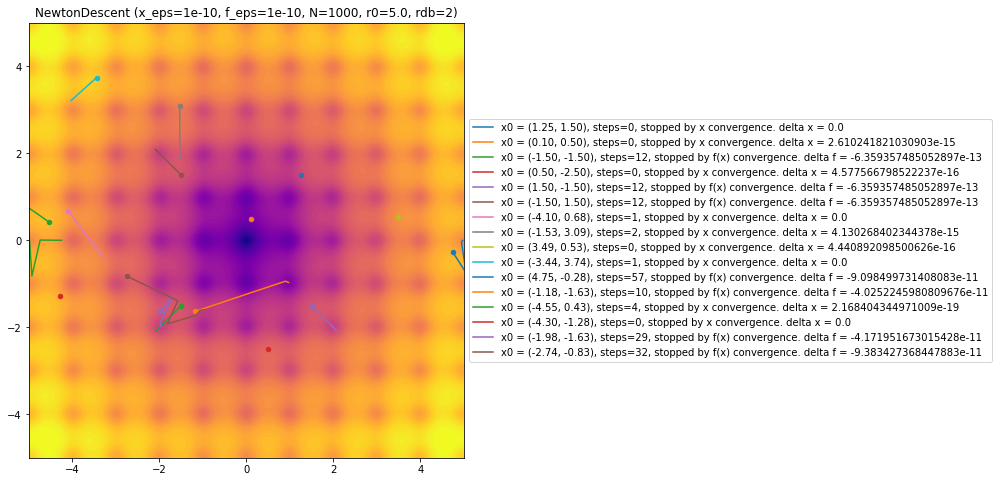

In [6]:
f = ackley.f
df = ackley.df
ddf = ackley.ddf

# my_cmap = cm.coolwarm
ls = np.linspace(-5,5,200)
xx, yy = np.meshgrid(ls, ls, sparse=True)

fig = plt.gcf()
ax = plt.gca()

method = NewtonDescent(timeout=1000, rate=5)

# Підготовка зображення
ax.set_aspect(1.0) # відношення сторін 1:1
ax.set_xlim(-5,5) # межі по x
ax.set_ylim(-5,5) # межі по y
fig.set_size_inches((8,8)) # розмір зображення в "дюймах"
ax.set_title(str(method)) # додати заголовок

# Побудова графіків
plt.contourf(ls, ls, f([xx,yy]), levels=100, vmin=0, vmax=14, cmap='plasma') # Кольоровий графік f1(x,y) на області визначення ls x ls 


x0s = [(1.25,1.5), (0.1,0.5), (-1.5,-1.5), (0.5,-2.5), (1.5,-1.5), (-1.5,1.5)]
x0s+=zip(np.random.choice(ls, 10), np.random.choice(ls, 10))

for x0 in x0s:
    result = method.optimize(f, df, ddf, x_start=x0)

    x_history, y_history = result['x_history'].T


    plt.scatter(x_history[0], y_history[0], s=20) # Позначити червоним кружечком початкову точку
    plt.plot(x_history, y_history, label=f'x0 = ({x0[0]:.2f}, {x0[1]:.2f}), steps={result["steps"]}, {result["message"]}') # Побудувати траекторію спуску 

ax.legend(loc='center left', bbox_to_anchor=(1,0.5))


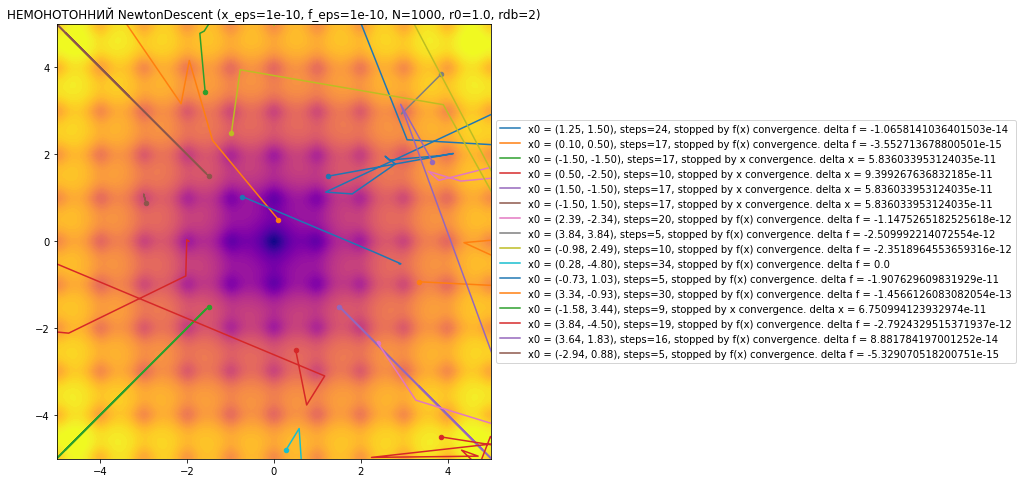

In [7]:
f = ackley.f
df = ackley.df
ddf = ackley.ddf

# my_cmap = cm.coolwarm
ls = np.linspace(-5,5,200)
xx, yy = np.meshgrid(ls, ls, sparse=True)

fig = plt.gcf()
ax = plt.gca()

method = NewtonDescent(timeout=1000, rate=1, monotonous=False)

# Підготовка зображення
ax.set_aspect(1.0) # відношення сторін 1:1
ax.set_xlim(-5,5) # межі по x
ax.set_ylim(-5,5) # межі по y
fig.set_size_inches((8,8)) # розмір зображення в "дюймах"
ax.set_title(str(method)) # додати заголовок

# Побудова графіків
plt.contourf(ls, ls, f([xx,yy]), levels=100, vmin=0, vmax=14, cmap='plasma') # Кольоровий графік f1(x,y) на області визначення ls x ls 


x0s = [(1.25,1.5), (0.1,0.5), (-1.5,-1.5), (0.5,-2.5), (1.5,-1.5), (-1.5,1.5)]
x0s+=zip(np.random.choice(ls, 10), np.random.choice(ls, 10))

for x0 in x0s:
    result = method.optimize(f, df, ddf, x_start=x0)

    x_history, y_history = result['x_history'].T


    plt.scatter(x_history[0], y_history[0], s=20) # Позначити червоним кружечком початкову точку
    plt.plot(x_history, y_history, label=f'x0 = ({x0[0]:.2f}, {x0[1]:.2f}), steps={result["steps"]}, {result["message"]}') # Побудувати траекторію спуску 

ax.legend(loc='center left', bbox_to_anchor=(1,0.5))
